# COGS 108 - Final Project 

# Overview


In this project I explored the effects of San Diego zip code population sizes and their median incomes on the quality of nearby parks, which was gauged by the average Yelp ratings of said parks. In an attempt to answer this question I curated a dataframe consisting of Yelp reviews on San Diego parks, population size in the parks' zip codes, and the median household and individual incomes. The analysis consisted of plots to visualize trends and relationships and k-tests between different variables. The data analysis produced debateable results as the data set was quite small and revealed little correlation but significant p-values.

# Names & GitHub ID

- Name: Tiffany Ly
- GitHub Username: Tiff-Ly

# Research Question

How does population size and median incomes affect the quality of nearby parks in San Diego?

## Background and Prior Work

San Diego Parks and Recreations owns and runs 58 recreation centers and 275 playgrounds (reference 3). Parks and Recreations also oversees specific open spaces, cemeteries, and water parks (reference 3). This encompasses over 42,000 acres of land, which must be routinely maintained. Naturally, proper budgeting for these public spaces is vital in keeping them safe and up-to-date. 
  
The operation of San Diego parks and open spaces is crucial for promoting healthy and active lifestyles for all San Diegans (reference 1). It is important to offer the same enriching environments to communities to draw in more diversity to all parts of the county. In order to keep all spaces up-to-date and accessible to San Diegans, budgeting plays a huge role in determining how and which parks receive more maintenance and renovations. 
    
Currently the budget for parks and recreation is about 55.8 million dollars (reference 4), most of which appears to be allocated towards wealthy or newer communities (reference 2). Richer neighborhoods tend to have better parks and spaces as they receive more in developmental impact fees, fees paid by developers to the city to build new roads, parks and other amenities. Poorer communities on the other hand receive far less of these fees, thus having more run down facilities. A proposed change to the budget plan would be to allocate funds more proportionally, based upon population size in conjunction with median incomes. It is presumed that areas with more foot traffic will see more wear on its parks and open spaces, so more money will be needed to maintain these facilities.


References:
- 1) https://www.sandiego.gov/park-and-recreation/general-info
- 2) https://www.voiceofsandiego.org/topics/government/if-your-local-park-sucks-this-is-probably-why/
- 3) https://www.sandiego.gov/sites/default/files/fiscal_year_2020_parks_and_recreation_department_capital_improvement_program_adopted_budget.pdf
- 4) https://www.sandiegocounty.gov/content/dam/sdc/auditor/pdf/caoplan_20-22.pdf

# Hypothesis


I hypothesize that the larger the population size and the higher the median incomes are the better the nearby parks will be. This is because there are more individuals in the nearby vicinity of these parks, which should result in more foot traffic and eventually more repairs/renovations long term as well as just a larger amount of funds being allocated to this area because of the bigger population size. 

# Dataset(s)

With multiple data sets I plan to use the yelp reviews for the ratings and location of parks, and the US zip code data for population size, household and individual income medians as well as unemployment rates. 


- Dataset Name: San Diego Parks Yelp
- Link to the dataset:  https://www.yelp.com/ (data curated by Prof Ellis)
- Number of observations: 833
- This data provides the ratings of different parks around San Diego County as well as their locations.


- Dataset Name: US Zip Codes Database
- Link to the dataset: https://simplemaps.com/data/us-zips
- Number of observations: 33,097
- This database provides demographic information (e.g. population size, income, unemployment) for all states and territories of the US.  


- Dataset Name: List of San Diego City Council Districts by Zip Code (*Not used in final dataframe)
- Link to the dataset: https://www.sandiego.gov/sites/default/files/list_of_san_diego_city_council_districts_by_zip_code.pdf
- Number of observations: 57
- This data contains lists of zip codes the different San Diego council districts oversee.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

# Data Cleaning

All the datasets have uniform entries so I don't need to adjust the entries too much. I stripped some information to make it its own column and adjusted some of the data types, but over all the data is pretty clean.

First the datasets must be pulled into this notebook, which is done in the cell below.

In [2]:
zip_data = pd.read_csv('uszips.csv')
yelp_df = pd.read_csv('yelp_SD_parks.csv')

From the zip code dataset I already know which columns I need for my analysis.

In [3]:
zip_data = zip_data[['zip', 'population', 'income_household_median', 'income_individual_median']]

In order to get the population sizes of each park's zip code I have to split the zip code from the address column.

In [4]:
yelp_df['zip_code'] = yelp_df['address'].apply(lambda x: x.split('CA '))

In [5]:
def strip_zip(x):
    '''Strips all zip codes from the address column.'
    
    Parameters
    ----------
    x : string
        A provided address.
        
    Returns
    -------
    output : 'Error' or int
        A zip code as an integer.
    '''
    
    if len(x) != 2:
        return 'Error'
    else:
        return int(x[1].strip())
    
yelp_df['zip_code'] = yelp_df['zip_code'].apply(strip_zip)

In [6]:
yelp_df = yelp_df[yelp_df['zip_code'] != 'Error'] 
yelp_df.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed,zip_code
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False,92101
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False,92108
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False,92101
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False,92116
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False,92118


In [7]:
# There are quite a few entries in this dataset that don't pertain to parks
# So it's important to drop these before moving onto the analysis

def name_filter(name):
    '''Drops yelp reviews of places that aren't parks.'
    
    Parameters
    ----------
    name : str
        Name of the place being reviewed.
        
    Returns
    -------
    name: string or 'Not a Park'
        The name of the park being reviewed.
    '''
    
    name = name.lower()
    
    if 'north park' in name:
        return 'Not a Park'
    elif 'park' in name:
        return name
    else:
        return 'Not a Park'   

The district data below was originally intended to add further context on zip codes and possible correlations between the quality of parks and certain council districts, however the data was ultimately omitted from the dataframe as it's not one of the specific variables I'm interested in.

In [8]:
District_dict = {
    'Council District 1' : [92014, 92037, 92038, 92067, 92093, 92121, 92122, 92130],
    'Council District 2' : [92117, 92111, 92109, 92108, 92107, 92106],
    'Council District 3': [92101, 92102, 92103, 92104, 92105, 92110, 92116, 92132, 92134],
    'Council District 4': [92102, 92105, 92113, 92114, 92115, 92139],
    'Council District 5' :[92127, 92128, 92129, 92131],
    'Council District 6' : [92111, 92117, 92121, 92123, 92126, 92129, 92145],
    'Council District 7' : [92108, 92111, 92119, 92120, 92123, 92124, 92171],
    'Council District 8' : [92102, 92113, 92154, 92173],
    'Council District 9' : [92102, 92104, 92105, 92113, 92115, 92116]
}

def find_district(zip_co):
    '''Categorizes each zip code under a council district'
    
    Parameters
    ----------
    zip_co : int
        A zip code of a park.
        
    Returns
    -------
    ret : string or 'Error'
        A secific council district.
    '''
    
    ret = None
    for key, value in District_dict.items():
        if zip_co in value:
            ret = key
        else:
            continue
    if ret is None:
        return 'Error'
    return ret
        
    
yelp_df['district'] = yelp_df.zip_code.apply(find_district)
all_data = pd.merge(yelp_df, zip_data, left_on = 'zip_code', right_on = 'zip')

In [9]:
all_data = all_data.drop(['phone', 'id', 'url', 'longitude', 'latitude', 'is_closed'], axis = 1)


In [10]:
all_data = all_data.reset_index(drop = True)

In [11]:
districts = yelp_df[yelp_df['district'] != 'Error']
districts = districts.reset_index(drop=True)

In [12]:
all_data = pd.merge(districts, all_data, left_on = 'zip_code', right_on = 'zip')

In [13]:
all_data['zip'] = all_data['zip'].astype(str)

Some errors arose when I was moving around some code, some columns ended up being duplicated in the final data frame. So this code here was to try and get it back to a nice format with only the information I needed.

In [14]:
all_data = all_data.fillna(0)
all_data = all_data.drop_duplicates(subset = ['name_x'])
all_data.name_x = all_data.name_x.apply(name_filter)
all_data = all_data[all_data['name_x'] != 'Not a Park']


In [15]:
all_data = all_data.reset_index(drop=True)
all_data = all_data[['name_x', 'rating_x', 'review_count_x', 'population', 'income_household_median', 'income_individual_median']]
all_data.columns = ['name', 'rating', 'review_count', 'population', 'income_household_median', 'income_individual_median']

In [16]:
# This is the final dataframe I will be using for my analysis portion of the project
all_data

,name,rating,review_count,population,income_household_median,income_individual_median
0,balboa park,5.0,2105,39313.0,66202.0,44668.0
1,waterfront park,4.5,242,39313.0,66202.0,44668.0
2,pioneer park,4.0,55,39313.0,66202.0,44668.0
3,harbor island park,4.5,71,39313.0,66202.0,44668.0
4,golden hill park,4.0,35,39313.0,66202.0,44668.0
...,...,...,...,...,...,...
189,ruocco park,4.0,18,0.0,0.0,0.0
190,sabre springs park,4.5,3,51066.0,97952.0,50344.0
191,south creek neighborhood park,4.5,9,51066.0,97952.0,50344.0
192,carmel mountain ranch community park,4.0,18,51066.0,97952.0,50344.0


# Data Analysis 

#### EDA
For the start of my EDA I just want to see the general distribution of all my individual data pieces and see if there are any extreme outliers and possible explanations for them.

The ratings data has a peak at 4.5 stars, there's also a tail trailing to the left. This means that the majority of the park ratings are fairly positive though with some lower ratings. I wouldn't consider any of this data outliers or extreme values because the ratings are already confined to a scale between 1 and 5.

Text(0.5, 1.0, 'Frequency of Yelp Ratings')

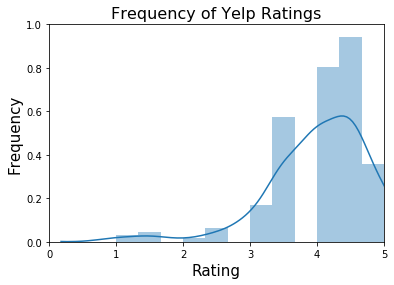

In [17]:
# dist. of yelp ratings
x = all_data.rating
rating_dist = sns.distplot(x)

rating_dist.set(xlim = (0, 5), ylim = (0, 1))
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Frequency of Yelp Ratings", fontsize = 16)

In the cell below you can see that the majority of parks being reviewed has a population between 30,000 and 60,000.

Text(0.5, 1.0, 'Distribution of Population Sizes Across San Diego')

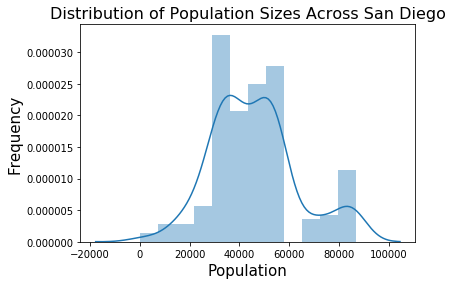

In [18]:
# dist. of populations from all the different zip codes
x = all_data.population
pop_dist = sns.distplot(x)

plt.xlabel('Population', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Distribution of Population Sizes Across San Diego", fontsize = 16)

The plot below suggests that the most rated parks' populations' had household incomes between 60,000 and 80,000 dollars.

Text(0.5, 1.0, 'Distribution of Median Household Incomes Across San Diego')

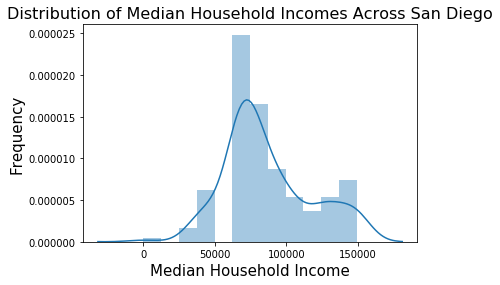

In [19]:
# dist. of household median incomes of all the zip codes
x = all_data.income_household_median
house_dist = sns.distplot(x)

plt.xlabel('Median Household Income', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Distribution of Median Household Incomes Across San Diego", fontsize = 16)

The plot below suggests that the most rated parks' populations' had individual incomes between 40,000 and 45,000 dollars.

Text(0.5, 1.0, 'Distribution of Median Individual Incomes Across San Diego')

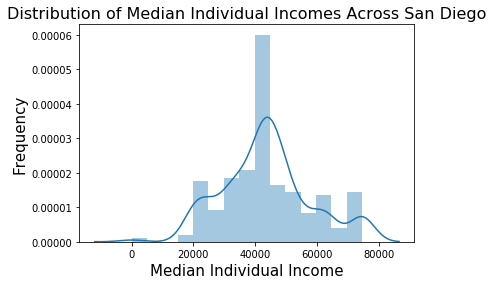

In [20]:
# dist. of individual median incomes of all the zip codes
x = all_data.income_individual_median
ind_dist = sns.distplot(x)

plt.xlabel('Median Individual Income', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title("Distribution of Median Individual Incomes Across San Diego", fontsize = 16)

Now I want to see if there's any trends between different variables in the data. To get a general idea of this I have plotted a scatter matrix in the cell below. From these visualizations, there are no clear trends between ratings and the other variables. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D65278F48>,
      dtype=object)

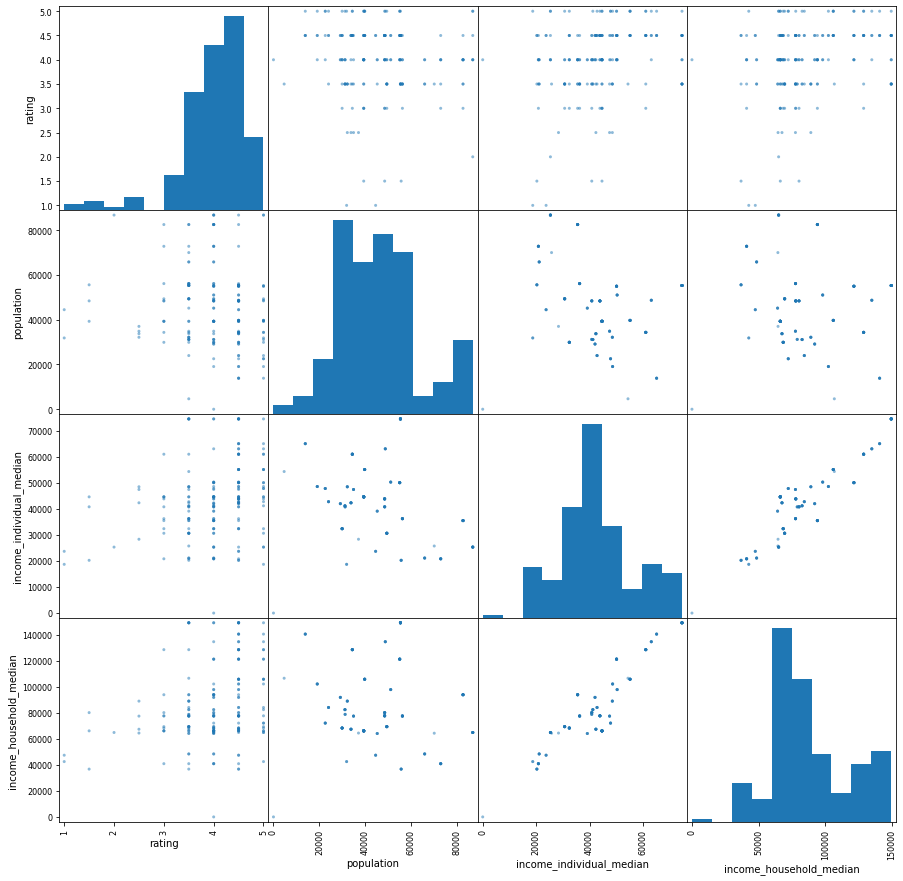

In [21]:
pd.plotting.scatter_matrix(all_data[['rating','population','income_individual_median', 
                                     'income_household_median']], figsize=(15, 15))

#### Further Analysis
Now after some basic EDA I'm looking deeper into the data to find correlations to help make inferences to answer my question. I will also run some k-tests with the variables, as opposed to a t-test, since the data is nonparametric.

In [22]:
# descriptive summary of all variables
desc = all_data.describe()
desc

,rating,review_count,population,income_household_median,income_individual_median
count,194.000000,194.000000,194.000000,194.000000,194.000000
mean,4.012887,65.329897,45837.948454,86553.835052,43571.020619
std,0.748808,215.563353,17473.801343,30338.900663,14400.415053
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,3.500000,5.000000,33767.000000,66202.000000,35545.000000
50%,4.000000,12.500000,45202.000000,77774.000000,43888.000000
75%,4.500000,46.750000,55316.000000,104990.500000,50127.000000
max,5.000000,2105.000000,86811.000000,149344.000000,74631.000000


The correlations between ratings and the other variables are not that large, based off this I predict that I will fail to reject null hypothesis.

In [23]:
# testing to find the correlation coefficients between the variables
corrs = all_data.corr()
corrs

,rating,review_count,population,income_household_median,income_individual_median
rating,1.000000,0.100910,-0.099350,0.271303,0.262580
review_count,0.100910,1.000000,-0.104503,-0.117032,-0.016286
population,-0.099350,-0.104503,1.000000,-0.065398,-0.262873
income_household_median,0.271303,-0.117032,-0.065398,1.000000,0.909565
income_individual_median,0.262580,-0.016286,-0.262873,0.909565,1.000000


The k-tests will be run on rating, population, and household and individual incomes.

In the cell below the first test compares ratings to population and both income variables. Population and household median incomes have smaller p-values meaning they are more likely to have an effect on ratings than individual median incomes. 

In [24]:
outcome, predictors = patsy.dmatrices('rating ~ population + income_household_median + income_individual_median', all_data)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     5.530
Date:                Sun, 13 Dec 2020   Prob (F-statistic):            0.00116
Time:                        15:47:30   Log-Likelihood:                -210.53
No. Observations:                 194   AIC:                             429.1
Df Residuals:                     190   BIC:                             442.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

The cell below is a k-test on ratings and population, the p value is quite low meaning there may be an affect of population on ratings of parks.

In [25]:
outcome, predictors = patsy.dmatrices('rating ~ population', all_data)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.914
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.168
Time:                        15:47:30   Log-Likelihood:                -217.69
No. Observations:                 194   AIC:                             439.4
Df Residuals:                     192   BIC:                             445.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2080      0.151     27.884      0.0

The two cells below test household and individual median incomes to park ratings. Both resulted in a p value of 0, suggesting a large effect from both variables. However, these values will not be taken at face value, more discussion on these results will come later.

In [26]:
outcome, predictors = patsy.dmatrices('rating ~  income_individual_median', all_data)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     14.22
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           0.000217
Time:                        15:47:30   Log-Likelihood:                -211.72
No. Observations:                 194   AIC:                             427.4
Df Residuals:                     192   BIC:                             434.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [27]:
outcome, predictors = patsy.dmatrices('rating ~ income_household_median', all_data)
mod = sm.OLS(outcome, predictors)  
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     15.26
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           0.000130
Time:                        15:47:30   Log-Likelihood:                -211.24
No. Observations:                 194   AIC:                             426.5
Df Residuals:                     192   BIC:                             433.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

#### Results
The results of this analysis suggests that both household and individual median incomes have a strong effect on park quality, which is gauged by park ratings on Yelp. There also appears to be some effect from the population as the p-value is almost 0. However, this analysis is ultimately inconclusive as the dataset used is quite small once all the data was wrangled.  

# Ethics & Privacy

For the San Diego parks Yelp dataset all the information within the dataset is already publicly available for all Yelp users. There is no personal information linked to the entries in this data set, therefore there are no clear privacy issues. As for the US zip codes database, all the data was compiled from multiple reliable sources including the U.S. Postal Service, U.S. Census Bureau, and the IRS. It should be noted that certain zip codes will have relatively small populations, which would make it easier to identify individuals when given demographic information, though no such data of that nature exists in my dataframe. The zip code database is compliant with the Safe Harbor Methods for privacy, which then carried over to the dataset used here. Although privacy is secured in my data, the questions asked and analysis conducted may lead to unethical use. The questions asked in this project pertain to incomes in different regions of San Diego, the budgetary decisions made based on the analysis done may harm minority or lower-income groups, two groups that often overlap. Perhaps if the data frame was larger the results would be very different and thus change how the data can be misused, but it is always important to make sure that vulnerable groups are protected.  

# Conclusion and Discussion 

The goal of this project was to see if there is any relationship between the population size and median incomes with the quality of nearby parks. This question was asked to help answer a larger question of how to audit the San Diego Parks and Recreation budget for the next 5 years. From this data analysis I conclude that the median incomes (both household and individual) in different areas of San Diego _may_ have an affect on the quality of parks. 

The results are inconclusive because the dataset after cleaning and wrangling became quite small, thus there were not enough pieces of data to perform an accurate analysis. Because of this, my answer to the overarching question of how to audit the San Diego Parks and Rec funds would be to do more data analysis on larger datasets, and then perhaps the uncertain results of this analysis can be magnified. It's important to note that the data frame did not span all reaches of San Diego County and its parks, which without a doubt affected all the variables' distributions and correlations. So, further analysis could be beneficial in supporting the little correlation found here. Although it seems plausible that areas with a wealthier population will have better parks in comparison to lower-income areas, my data analysis just cannot be used to definitively support this.

If this data analysis were to be continued using larger and more informative datasets, stronger relationships may become more apparent. If that were the case, those results could be used to help benefit underrepresented or neglected areas of San Diego. After all, one of the main missions of the Parks and Recreation department is to provide the finest parks and open spaces for all San Diegans to promote happy and healthy living. If only the most populated or wealthiest areas of San Diego had nice and well kept parks, it would not be very fair for the citizens in other areas. So I believe that this work could be used to help provide parks and facilities of the same high standards to all parts of the county. 